In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [174]:
df = pd.read_csv('/drive/notebooks/dataset.csv')

In [175]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [176]:
df.shape

(303, 14)

In [177]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [178]:
import piplite
await piplite.install('seaborn')
import seaborn as sns

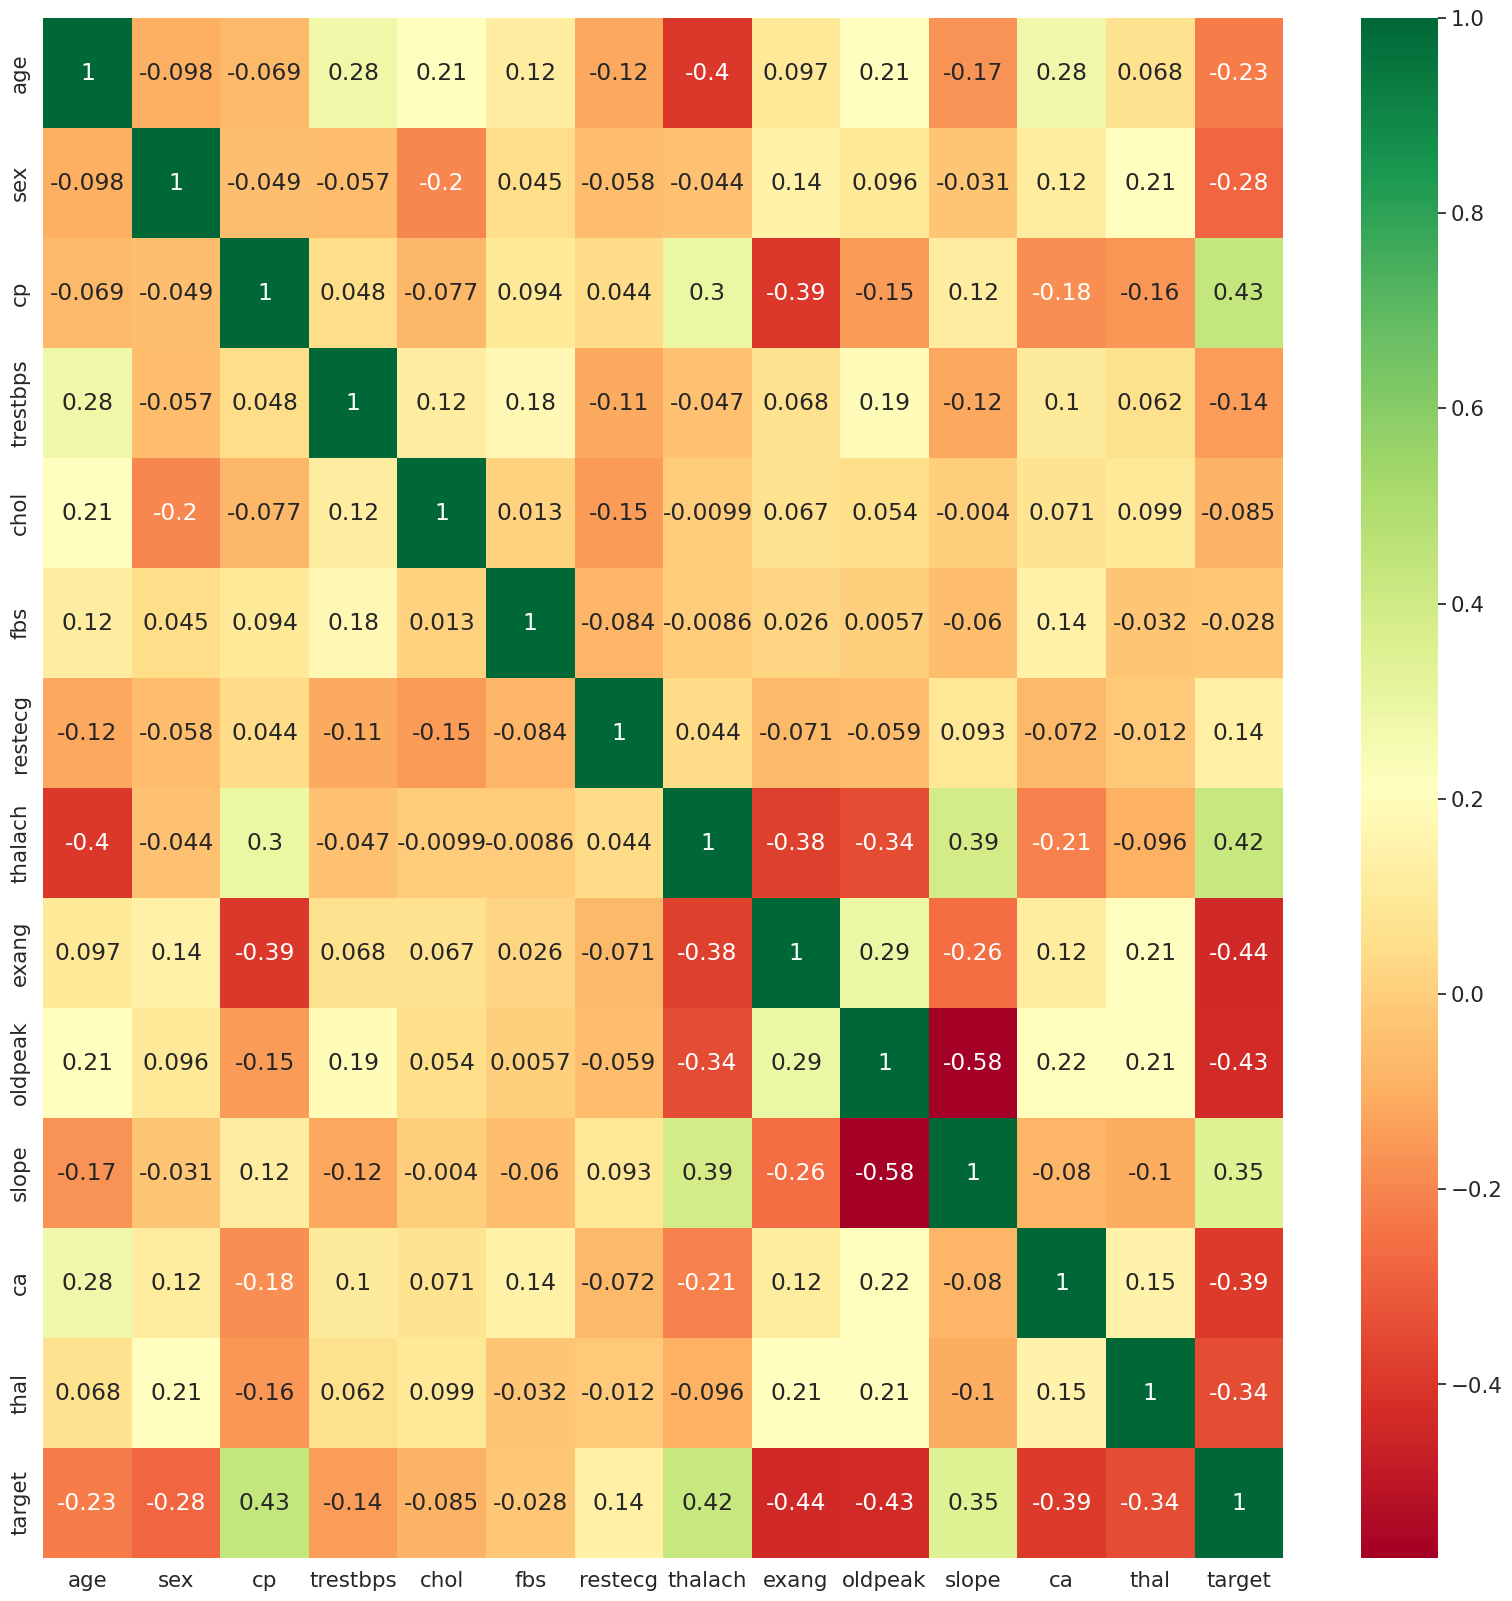

In [179]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

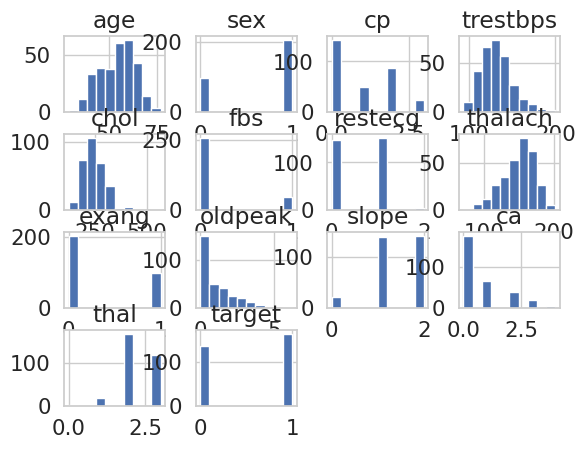

In [180]:
df.hist()

<AxesSubplot:xlabel='target', ylabel='count'>

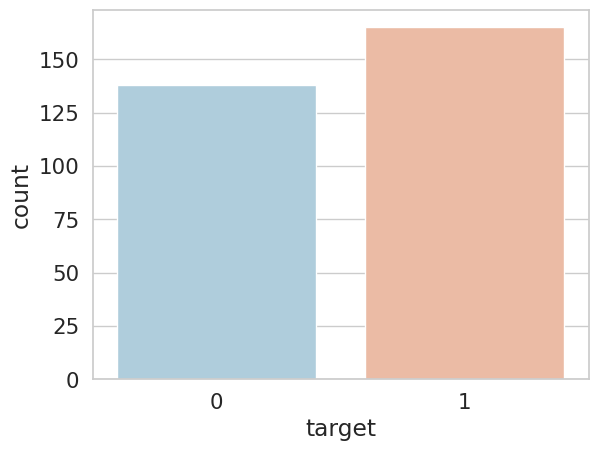

In [181]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

In [182]:
df = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [183]:

from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [184]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [185]:
y = df['target']
X = df.drop(['target'], axis = 1)

## KNN

In [186]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

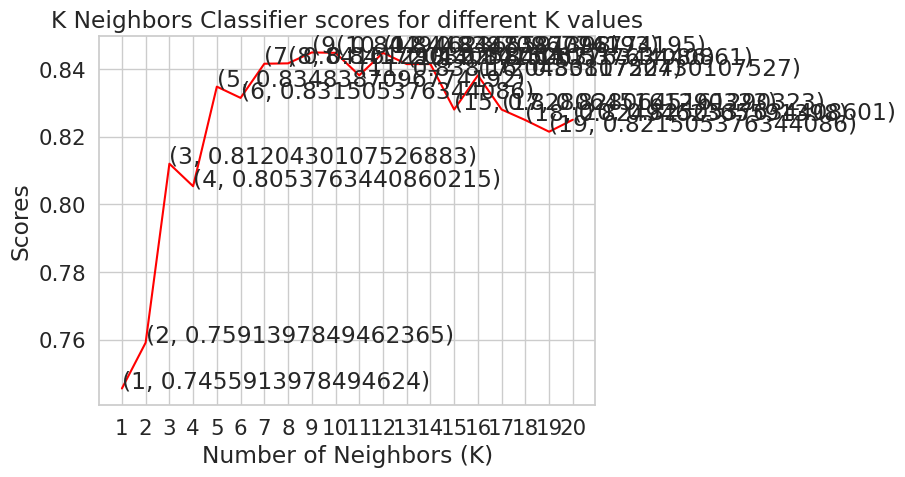

In [187]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [188]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [189]:
score.mean()

0.8448387096774195

In [190]:
knn_classifier_2 = KNeighborsClassifier(n_neighbors = 9)
score=cross_val_score(knn_classifier_2,X,y,cv=12)
score.mean()

0.8514102564102565

## Random Forest Classifier

In [191]:
from sklearn.ensemble import RandomForestClassifier

In [192]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [193]:
score.mean()

0.789247311827957

## KNN(Suite)

In [194]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [195]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [196]:
# Fit the KNN classifier on the training data
knn_classifier = KNeighborsClassifier(n_neighbors = 2)
knn_classifier.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=2)

In [197]:
# Predict the labels of the test data
y_pred = knn_classifier.predict(X_test)


In [198]:

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[25  2]
 [10 24]]


In [199]:
import seaborn as sns

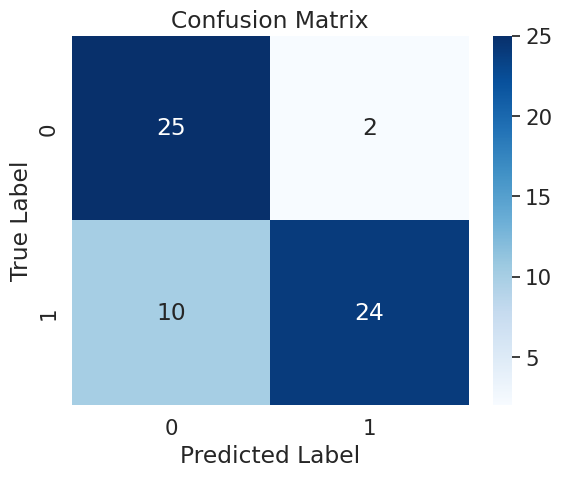

In [200]:
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [201]:
from sklearn.metrics import roc_curve, roc_auc_score



In [202]:
# Fit the KNN classifier on the training data
knn_classifier = KNeighborsClassifier(n_neighbors = 2)
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=2)

In [203]:

# Predict the probabilities of positive class for the test data
y_pred_prob = knn_classifier.predict_proba(X_test)[:, 1]


In [204]:
# Compute the FPR and TPR for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


In [205]:

# Compute the AUC score
auc = roc_auc_score(y_test, y_pred_prob)


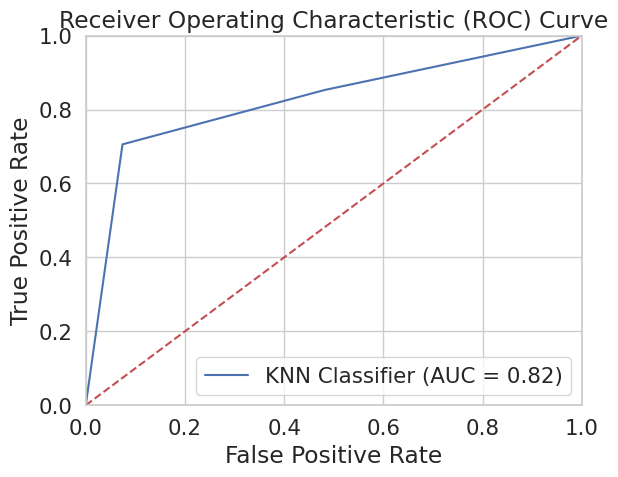

In [206]:

# Plot the ROC curve
plt.plot(fpr, tpr, label='KNN Classifier (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [207]:
from sklearn.metrics import accuracy_score, f1_score


In [208]:
from sklearn.metrics import mean_squared_error


In [209]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("F1 score: {:.2f}%".format(f1 * 100))
print("Taux d'erreur RMSE: {:.2f}".format(rmse))

Accuracy: 80.33%
F1 score: 80.00%
Taux d'erreur RMSE: 0.44


In [210]:
from sklearn.metrics import classification_report


In [211]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.93      0.81        27
           1       0.92      0.71      0.80        34

    accuracy                           0.80        61
   macro avg       0.82      0.82      0.80        61
weighted avg       0.83      0.80      0.80        61



## NB

In [212]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [213]:
y_pred = nb.predict(X_test)

In [214]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 85.25%


In [215]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[22  5]
 [ 4 30]]


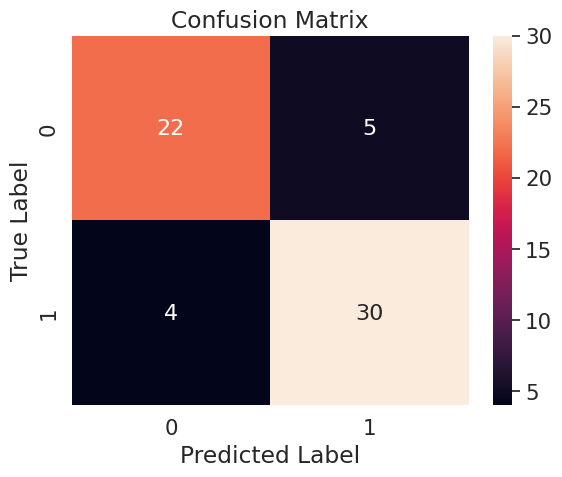

In [216]:
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

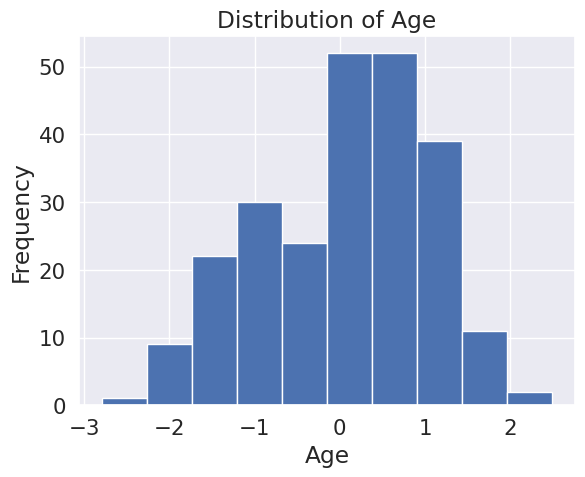

In [217]:
plt.hist(X_train["age"])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

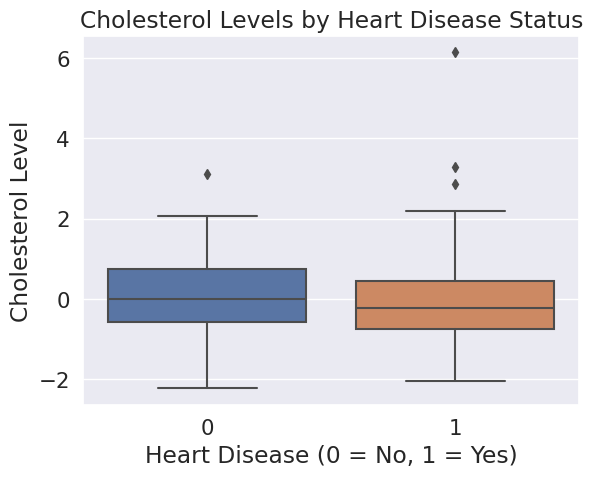

In [218]:
sns.boxplot(x=y_train, y=X_train["chol"])
plt.title("Cholesterol Levels by Heart Disease Status")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Cholesterol Level")
plt.show()

In [219]:
import piplite
await piplite.install('scikit-plot')


In [220]:
import matplotlib.pyplot as plt
from scikitplot.metrics import plot_roc

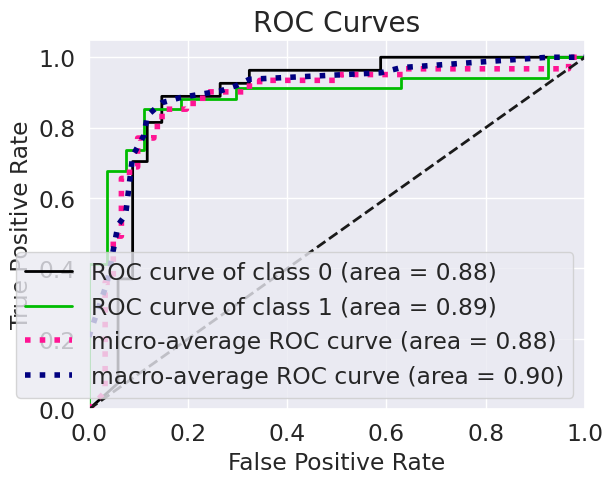

In [221]:
plot_roc(y_test, nb.predict_proba(X_test))
plt.show()

In [222]:
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error


In [223]:

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("F1 score: {:.2f}%".format(f1 * 100))
print("Taux d'erreur RMSE: {:.2f}".format(rmse))

Accuracy: 85.25%
F1 score: 86.96%
Taux d'erreur RMSE: 0.38


In [224]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [225]:
x= df.drop(columns='target',axis=1)
y=df['target']

In [226]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [227]:
classifier=svm.SVC(kernel='linear')

In [228]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [229]:
x_train_pred=classifier.predict(x_train)
training_data_accuracy=accuracy_score(x_train_pred,y_train)

In [230]:
print("Accuracy of training data:",training_data_accuracy)

Accuracy of training data: 0.9049586776859504


In [231]:
x_test_pred=classifier.predict(x_test)
testing_data_accuracy=accuracy_score(x_test_pred,y_test)

In [232]:
print("Accuracy of testing data:",testing_data_accuracy)

Accuracy of testing data: 0.8032786885245902


In [233]:
conf_matrix = confusion_matrix(y_test, x_test_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[22  6]
 [ 6 27]]


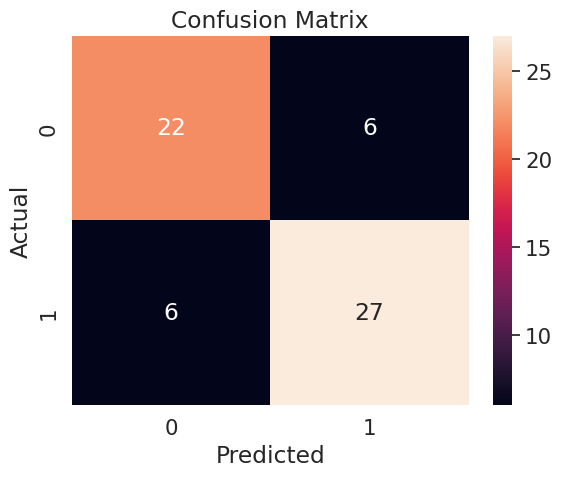

In [234]:
# Predict the values for the test set
y_pred = classifier.predict(x_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [235]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [236]:
# predict probabilities for test set
y_score = classifier.decision_function(x_test)

# calculate false positive rate (fpr) and true positive rate (tpr) at different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)


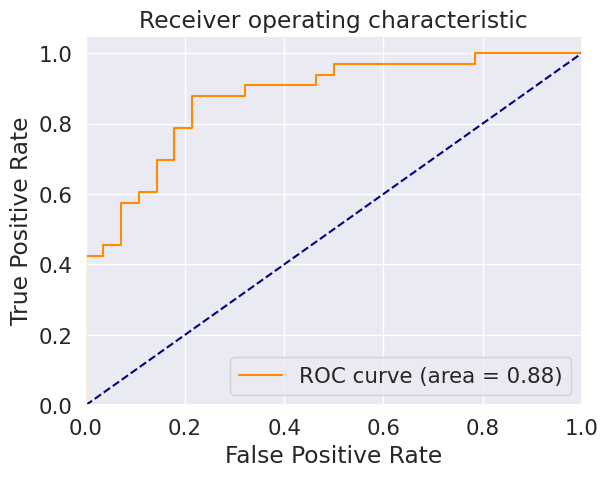

In [237]:
# plot ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [238]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("F1 score: {:.2f}%".format(f1 * 100))
print("Taux d'erreur RMSE: {:.2f}".format(rmse))


Accuracy: 80.33%
F1 score: 81.82%
Taux d'erreur RMSE: 0.44


In [239]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.82      0.82      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

